In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from typing import Dict
from preprocessing import expand_ann
import re
import os

In [2]:
all_train_files = os.listdir('training_data')
num_subjects = 8
out_dir = 'processed_training_data'

In [3]:
all_train_files = os.listdir('training_data')
num_subjects = 8

for subject_num in range(1, num_subjects + 1):
    query_str = f'subject_00{subject_num}'
    subject_files = [x for x in all_train_files if query_str == x[:len(query_str)]]
    
    num_trials = len(subject_files) / 4
    assert num_trials.is_integer()
    num_trials = int(num_trials)
    
    for trial_num in range(1, num_trials + 1):
        imu = pd.read_csv(f'training_data/subject_00{subject_num}_0{trial_num}__x.csv',
                          names=['acc_x', 'acc_y', 'acc_z', 'gyro_x', 'gyro_y', 'gyro_z'])
        imu_t = pd.read_csv(f'training_data/subject_00{subject_num}_0{trial_num}__x_time.csv', names=['time'])
        ann = pd.read_csv(f'training_data/subject_00{subject_num}_0{trial_num}__y.csv', names=['labels'])
        ann_t = pd.read_csv(f'training_data/subject_00{subject_num}_0{trial_num}__y_time.csv', names=['time'])
        
        expanded_ann = expand_ann(
            imu_t['time'].tolist(),
            ann['labels'].tolist(),
            ann_t['time'].tolist()
        )
        
        # Verify lengths are the same
        assert len(expanded_ann['ann']) == len(imu)
        
        imu.to_csv(f'{out_dir}/subject_00{subject_num}_0{trial_num}__x.csv', index=False)
        imu_t.to_csv(f'{out_dir}/subject_00{subject_num}_0{trial_num}__x_time.csv', index=False)
        pd.DataFrame(expanded_ann['ann'], columns=['labels']).to_csv(
            f'{out_dir}/subject_00{subject_num}_0{trial_num}__y.csv', index=False)
        pd.DataFrame(expanded_ann['ann_time'], columns=['time']).to_csv(
            f'{out_dir}/subject_00{subject_num}_0{trial_num}__y_time.csv', index=False)
        

37890 37890
70172 70172
43146 43146
54956 54956
59121 59121
38631 38631
31423 31423
66762 66762
55999 55999
55401 55401
48797 48797
51461 51461
42319 42319
36313 36313
47210 47210
19533 19533
34309 34309
34476 34476
56079 56079
34519 34519
44905 44905
48125 48125
59562 59562
45129 45129
46201 46201
46989 46989
44641 44641
39439 39439
48138 48138


In [4]:
# Verify lengths are the same
assert len(expanded_ann['ann']) == len(imu)

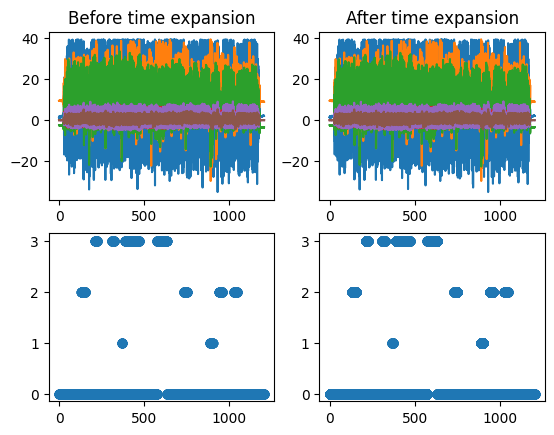

In [5]:
# Verify plots look the same
fig, axs = plt.subplots(2, 2)
axs[0][0].plot(imu_t, imu)
axs[0][0].set_title('Before time expansion')
axs[1][0].scatter(ann_t, ann)
axs[0][1].set_title('After time expansion')
axs[0][1].plot(imu_t, imu)
axs[1][1].scatter(expanded_ann['ann_time'], expanded_ann['ann'])
plt.show()